<a href="https://colab.research.google.com/github/aramos18/MBA-Data-Science/blob/main/ABD_TP01_Alan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importação das Bibliotecas**

In [1]:
import pandas                as pd
import numpy                 as np
import seaborn               as sns
import matplotlib.pyplot     as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error, r2_score, mean_absolute_error

## **Leitura e Visualização do Dataset**

In [2]:
url = "https://raw.githubusercontent.com/ProfLeandroLessa/classroom-datasets/70b3597e8cabf3255264c126f0f085144b9abc60/FDA/TP/horas_estudo.csv"

df = pd.read_csv(url, sep=";", header=0, decimal=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   horas_estudo    100 non-null    float64
 1   nota_avaliacao  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [3]:
df.head()

,horas_estudo,nota_avaliacao
0,16.07,40.05
1,20.41,66.49
2,34.29,91.50
3,34.10,87.09
4,32.34,69.30


In [4]:
df.describe()

,horas_estudo,nota_avaliacao
count,100.000000,100.000000
mean,20.766000,64.222600
std,10.731428,22.000436
min,0.380000,10.300000
25%,13.287500,47.505000
50%,19.815000,62.380000
75%,29.767500,84.540000
max,39.160000,100.000000


## **Separação dos dados em conjuntos de treinamento e teste (80%/20%)**

In [5]:
df_studies = df[["horas_estudo"]]
df_grades = df[["nota_avaliacao"]]

X_train, X_test, y_train, y_test = train_test_split(df_studies, df_grades,
                                                    test_size=0.2,
                                                    random_state=42)

## **Criação e treinamento do modelo de regressão linear**

In [6]:
model = LinearRegression()
model.fit(df_studies, df_grades)

LinearRegression()

## **Predições do modelo**

In [7]:
y_pred = model.predict(df_studies)

# **Avaliação de desempenho do modelo**

In [8]:
mae = mean_absolute_error(df_grades, y_pred)
mse = mean_squared_error(df_grades, y_pred)
r2 = r2_score(df_grades, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

Mean Absolute Error (MAE): 12.83868977098035
Mean Squared Error (MSE): 270.601202088843
Coeficiente de determinação (R²): 0.43528156504806215


In [9]:
score_do_algoritmo = r2
print("Score do algoritmo de regressão:", score_do_algoritmo)

Score do algoritmo de regressão: 0.43528156504806215


## **Visualização dos resultados**

1.   Matrix de Confusão e Mapa de Calor



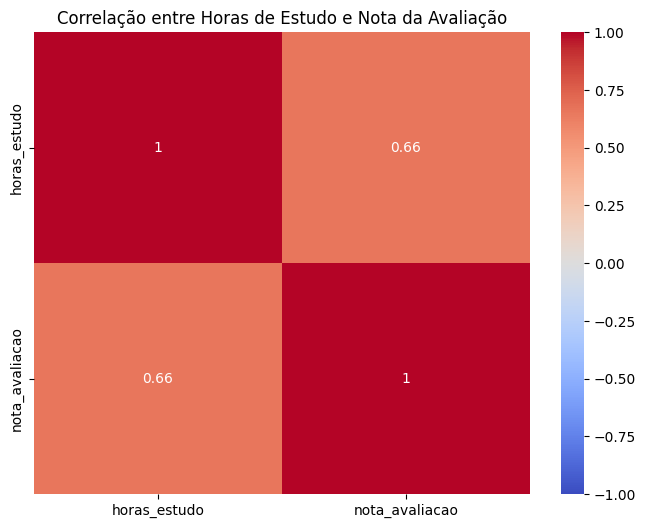

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlação entre Horas de Estudo e Nota da Avaliação")
plt.show()

2.   Gráfico de Regressão Linear



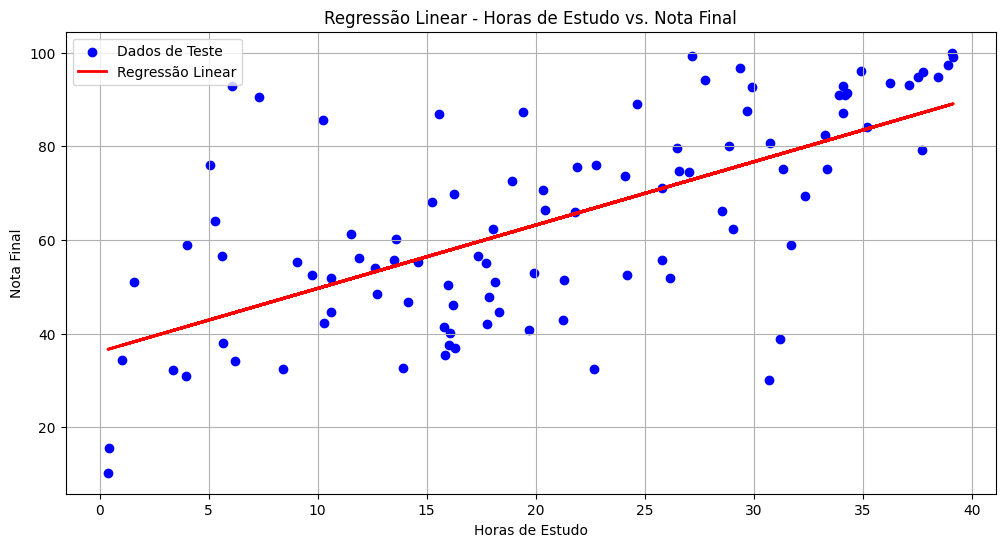

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df_studies, df_grades, color='blue', label='Dados de Teste')
plt.plot(df_studies, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota Final')
plt.title('Regressão Linear - Horas de Estudo vs. Nota Final')
plt.legend()
plt.grid(True)
plt.show()

3.   Coeficiente Linear



In [11]:
intercept = model.intercept_
print("Valor do intercepto:", intercept)

Valor do intercepto: [36.13518584]


4.    Coediciente Angular

In [12]:
coef_angular = model.coef_[0]
print("Valor do coeficiente angular:", coef_angular)

Valor do coeficiente angular: [1.35256738]


5.  Predições

In [14]:
horas_estudo = [[3.0]]
nota_prevista = model.predict(horas_estudo)
print("Previsão da nota para 3 horas de estudo:", nota_prevista[0])

Previsão da nota para 3 horas de estudo: [40.19288797]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
horas_estudo = [[30.0]]
nota_prevista = model.predict(horas_estudo)
print("Previsão da nota para 30 horas de estudo:", nota_prevista[0])

Previsão da nota para 30 horas de estudo: [76.71220716]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
horas_estudo = [[18.06]]
nota_predita = model.predict(horas_estudo)[0]

nota_real = df[df["horas_estudo"] == 18.06]["nota_avaliacao"].values[0]

# Calcula a diferença entre a nota predita e a nota real
diferenca = abs(nota_predita - nota_real)

print("Nota Predita:", nota_predita)
print("Nota Real:", nota_real)
print("Diferença:", diferenca)

Nota Predita: [60.56255268]
Nota Real: 62.32
Diferença: [1.75744732]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
